# Jupyter Notebook: Home Price Prediction

In this notebook, we predict California home prices using Linear Regression.
We explore the dataset, visualize feature relationships, train a regression model, evaluate its performance and interpret the model’s coefficients.

## 1. Import Libraries
In this section, we import all libraries required for data handling, visualization and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Linear Regression model
from sklearn.linear_model import LinearRegression 

# Metrics to evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load Dataset

We are using the built-in **California Housing dataset** from scikit-learn.  
This dataset contains information on California districts and is publicly available.

In [2]:
# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Preview first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 3. Explore Data

In [3]:
# Check the data structure we have 
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

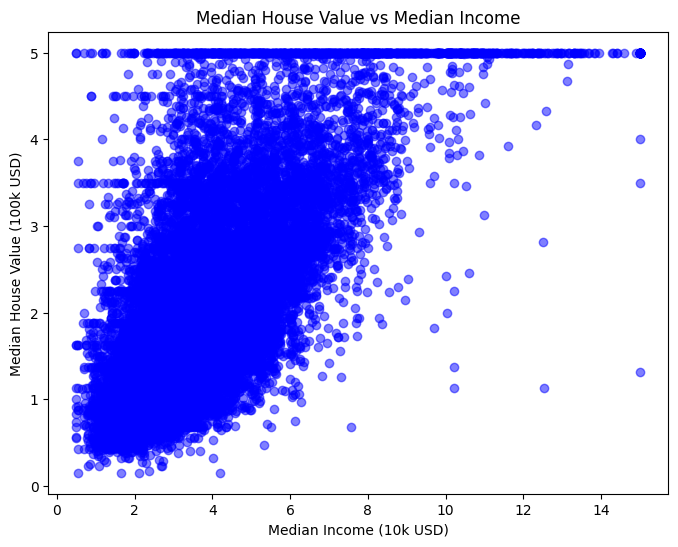

In [4]:
# Visualization: Plot of the Median Income vs Median House Value
plt.figure(figsize=(8,6))
plt.scatter(df['MedInc'], df['MedHouseVal'], color='blue', alpha=0.5)
plt.title('Median House Value vs Median Income')
plt.xlabel('Median Income (10k USD)')
plt.ylabel('Median House Value (100k USD)')
plt.show()

## 4. Split Data

We split the dataset into **features (X)** and **target (y)**, and then into **training** and **testing** sets.


In [5]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Train Linear Regression Model

We create and fit a Linear Regression model using the training data.

**Note:** Unlike the tutorial that use a single feature and require reshaping, our dataset has multiple features, so reshaping is not needed.

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 6. Predict and Evaluate Model

We predict the house prices on the test set and evaluate the model using **RMSE** and **R² Score**.

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.7455813830127763
R² Score: 0.5757877060324508


The model explains about 58% of the variation in home prices, with an average prediction error of 0.75 (≈ $75,000).

## 7. Visualize Predictions

We compare actual vs predicted house prices using a scatter plot.

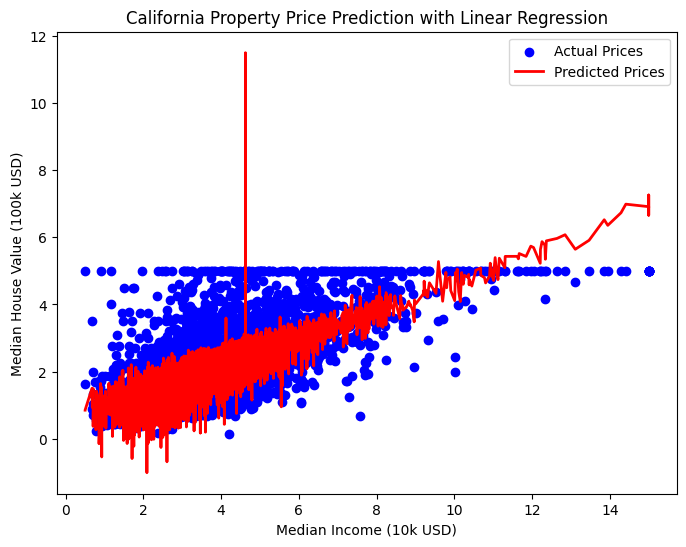

In [8]:
# Use a single feature for x-axis (Median Income)
x_feature = X_test['MedInc'].values  # just for the plot
y_actual = y_test.values             # the actual target values

# Sort x_feature for the line plot
sort_idx = x_feature.argsort()
x_feature_sorted = x_feature[sort_idx]
y_actual_sorted = y_actual[sort_idx]
y_pred_sorted = y_pred[sort_idx]  # same predictions, just reordered for plotting

plt.figure(figsize=(8,6))
plt.scatter(x_feature_sorted, y_actual_sorted, color='blue', label='Actual Prices')
plt.plot(x_feature_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Prices')
plt.title('California Property Price Prediction with Linear Regression')
plt.xlabel('Median Income (10k USD)')
plt.ylabel('Median House Value (100k USD)')
plt.legend()
plt.show()

The regression line show sharp spikes because the model was trained using all 8 features of the dataset. When we plot predictions against the Median Income, the other features still affect the predictions, causing the line to vary irregularly. To visualize a cleaner trend, we use a smoothed trend line.

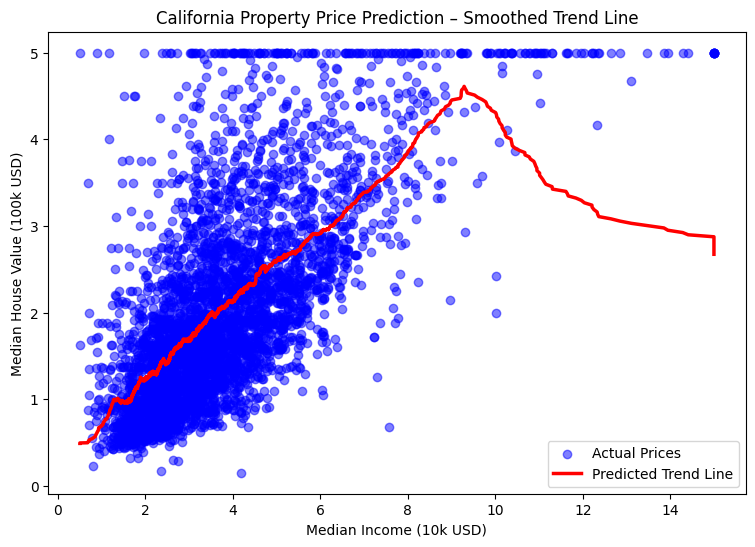

In [9]:
# Create a smoothed trend line using a rolling window
window = 150   # Larger window means smoother line
trend = np.convolve(y_pred_sorted, np.ones(window)/window, mode='same')

plt.figure(figsize=(9,6))
plt.scatter(x_feature_sorted, y_actual_sorted, color='blue', alpha=0.5, label='Actual Prices')
plt.plot(x_feature_sorted, trend, color='red', linewidth=2.5, label='Predicted Trend Line')
plt.title('California Property Price Prediction – Smoothed Trend Line')
plt.xlabel('Median Income (10k USD)')
plt.ylabel('Median House Value (100k USD)')
plt.legend()
plt.show()

## 8. Feature Coefficients

We check the coefficients of each feature to see which factors most affect house prices.

In [10]:
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coeff_df

,Feature,Coefficient
0,MedInc,0.448675
1,HouseAge,0.009724
2,AveRooms,-0.123323
3,AveBedrms,0.783145
4,Population,-0.000002
5,AveOccup,-0.003526
6,Latitude,-0.419792
7,Longitude,-0.433708


Median income has the strongest positive impact on home values, while latitude and longitude have the largest negative effects, showing that depending on the location, the price will vary. 

## 9. Simple Linear Regression with 1 feature (Median Income)

Coefficient: 0.41793849201896277
Intercept: 0.45085576703267893
R² Score: 0.47344749180719903


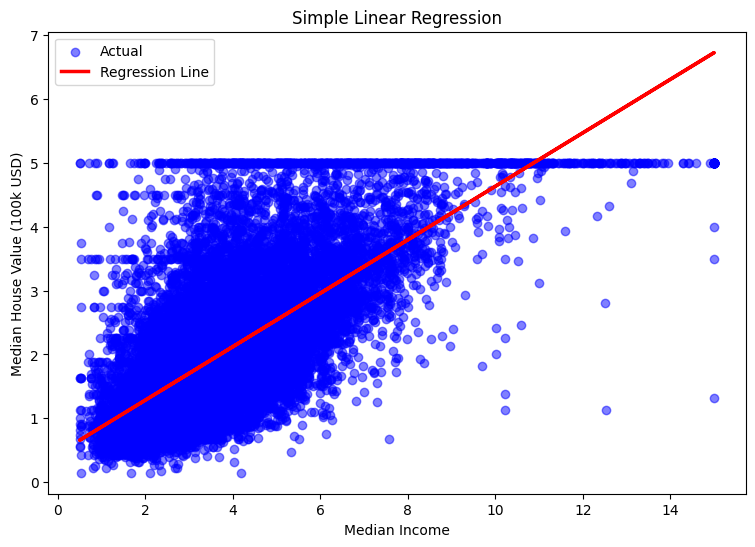

In [11]:
# Use only the Median Income as the single feature
X_simple = df[["MedInc"]]
y = df["MedHouseVal"]

# Train the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

# Get the predictions of the single model
y_simple_pred = simple_model.predict(X_simple)

print("Coefficient:", simple_model.coef_[0])
print("Intercept:", simple_model.intercept_)
print("R² Score:", simple_model.score(X_simple, y))

plt.figure(figsize=(9,6))
plt.scatter(df["MedInc"], y, color='blue', alpha=0.5, label="Actual")
plt.plot(df["MedInc"], y_simple_pred, color = 'red', label="Regression Line", linewidth=2.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value (100k USD)")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

Higher median income is strongly associated with higher median house values, as shown by the positive linear trend.

## 10. Conclusions

In this project, I explored the California Housing dataset and applied linear regression to predict median home values. I built a multivariable linear regression model using all available features and evaluated its performance with RMSE and R². The model demonstrated a reasonable ability to explain housing price variation, with Median Income being the strongest predictor of home value.

To better understand the relationship, I also analyzed a simple linear regression model using only Median Income. We can observe a trend, as median income increases median house value rises in a mostly linear way. The simple model is not as accurate as the full one however, it still gives a good basic idea and shows that income is the primary factor affecting housing prices.

In summary, this project highlights how both simple and multivariate linear regression can be used to model real-world housing markets. Future improvements could include using advanced algorithms such as Random Forests or Gradient Boosting for higher accuracy.